# **Lab #4. Visualizing Amounts and Distributions**
#### *This material was prepared by Yugyeong Jung*


# **Learning Objectives**

We are going to learn the following items: 

*   Google Colab environments
*   Pandas Basic
*   Python Plotly
*   Learning basics of data visualization: visualizing amounts and distributions  


# **Colab Introduction**

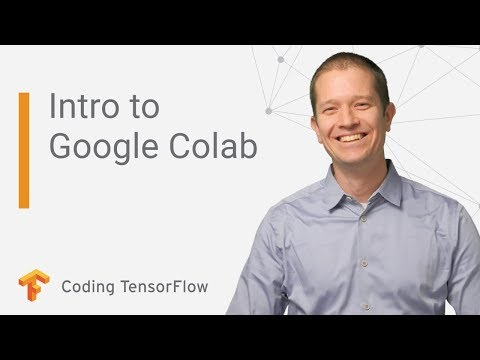

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI')

* Make a copy

Before we start our practice session, you always need to copy this notebook. Select: "File" >> "Save a Copy in Drive." Then you will have "Copy of XXX.ipynb" in your Google Drive on a new browser window.

![picture](https://drive.google.com/uc?export=view&id=1rWvCstP2aTmjnxMsDYWuk90ya5_CxVL5)

* Mount google drive

You may need to read or write files from external sources. For example, you may place a dataset in Google drive, and want to read it to draw a plot. To read/write files from Google Drive, we have to first mount your drive to the Colab system.

The below code shows how to mount your Google Drive. The code helps you to mount your Google Drive to the directory: '/content/drive'. In other sheets, you can find all your google drive files under the directory '/content/drive'. Please execute the following code. You will go through the Google authorization process, which will give you the authorization code. Then, simply copy-paste the authorization code to the input box below. 

1. Mount a Google Drive by executing code. It will ask you to enter an authorization code. Please click the URL below to acquire streaming permission, from which you can get an authorization code. Copy that code and paste it in the console pane of this section (after pasting it, press 'Enter').

* You should see the output like this: Enter your authorization code:
* Mounted at /content/drive

In [3]:
from google.colab import drive
google_drive_prefix = '/content/drive'
drive.mount(google_drive_prefix)

Mounted at /content/drive


2. Check directory '/content/drive/' . Google drive folder should be shown, if it is succesfully mounted.

In [4]:
!ls /content/drive/

MyDrive


Here, we only cover how to read/write data from Google Drive. You can also read/write files from other external sources. For example, you can load/save files from your local file system. For more information, please refer to the Colab tutorial for External data: Local Files, Drive, Sheets, and Cloud Storage.

In [5]:
import os

folder_directory = '/content/drive/My Drive/CS481_Data Visualization/'

if not os.path.exists(folder_directory):
  os.mkdir(folder_directory)

print('Great Job!!!' if os.path.exists(folder_directory) else 'Something wrong. The folder has not yet been created')

Great Job!!!


# **Pandas Basic**



* Dataset: Diamonds

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 

![picture](https://drive.google.com/uc?export=view&id=1xtUgPvwKPcikzBR3Vesb_-qKSutqIsdv)

## Read Data from Files


In [6]:
#Import pandas module
import pandas as pd 
#Let's read the file, diamonds.csv. You can easily do this with pd.read_csv(), which reads a csv file and returns a dataframe.
diamonds_df = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/diamonds.csv')
#Let's observe the data by using the *head* function.
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#Count the number of rows and columns in the DataFrame using 'shape' function
diamonds_df.shape

(53940, 10)

In [8]:
#To obtain the information on the dataset, use the info() method.
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
#Summarize the columns using describe() to obtain the distribution of variables
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
#For categorical variables(*cut, color, clarity), we need to use the include=object parameter
diamonds_df.describe(include=object)
#The top is the most common value
#The freq is the most common value’s frequency

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## Handling a DataFrame

In [11]:
#Select rows from a DataFrame: **loc[]** function
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html 
diamonds_low_df = diamonds_df.loc[diamonds_df['cut']=='Ideal']
diamonds_low_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [12]:
#Add new columns to the dataframe: 'price_per_carat' column
diamonds_df['price_per_carat'] = diamonds_df['price']/diamonds_df['carat']
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [13]:
#Drop the existing column: **drop()** function
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 
diamonds_df=diamonds_df.drop(columns=['price_per_carat'])
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
#Grouping dataframe according to 'cut' quality and count the number of rows
  #groupby('cut'): grouping the dataframe with 'cut' column 
  #count(): count the number of diamonds for each group
cut_count_df=diamonds_df.groupby('cut').count()
cut_count_df

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [15]:
#Leave only one column and rename it as cut_count
cut_count_df=cut_count_df[['carat']]
cut_count_df.columns=['cut_count']
cut_count_df

,cut_count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


#**Plotly Introduction**


## What is plotly?

From this lab session, we will learn how to implement various visualization plots with plotly libary! 

The Plotly Python library is an interactive and open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional plots. If you want to experience various plotly plots, visit this site: https://plotly.com/python/

While taking this course, you will meet two representative plotly graphing module: **plotly.express and plotly.graph_objects**. The easiest way to create figures is using the plotly.express module. However, certain kinds of figures are not yet possible to create with Plotly Express, such as 3D trace-types or subplots of different types. To construct such graphs, it would be easier to start from an empty plotly.graph_objects. 


![picture](https://drive.google.com/uc?export=view&id=1ja-TJuz9GTGSLp3NG0MZMEvE_AAxBNdO)

# **Visualizing Amounts**
In many scenarios, we are interested in the *amount* of the some set of numbers. **How can we effectively represent this amount?**

For example, we might want to visualize the total sales volume of different brands of cars, or the total number of people living in different cities. In these cases, we have a set of categories (e.g., brands of cars, cities) and a quantitative value for each category. 

The representative visualization methods in this scenario are the **bar plot, grouped bar plot, and heatmap.**

##**Bar plots**

Consider the total ticket sales for the most popular movies on a given weekend. The table shows top-five weekend gross ticket sales on the Christmas weekend of 2017. Bar plots are used to depict the relationship between a **categorical variable** and a **numerical variable**.

  This kind of data is commonly visualized with vertical bars.

![picture](https://drive.google.com/uc?export=view&id=1lebX-WKX21kWdA1IwTElmrL3xi6SFhyD)


The better solution for long labels in the bar plots is usually to swap the x and the y axis. 

Regardless of whether we place bars vertically or horizontally, we need to pay attention to the *order* in which the bars are arranged. We can rearrange bars, if there is **no natural ordering** to the categories the bars represent.


![picture](https://drive.google.com/uc?export=view&id=1o6fZkFyNDjn12JbtD-ud-yiZHIrrDl26)


*   Create a bar plot

  Using the diamonds dataset, we will visualize **the amount of diamonds** according to each cut quality. The original dataset will be preprocessed using pandas groupby function and be used to create a bar plot. 






In [16]:
#Let's use the dataframe we already made
cut_count_df

,cut_count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


In [17]:
import plotly.express as px 
fig=px.bar(cut_count_df,
           #Define x and y axis of the plot
           x=cut_count_df.index, 
           y=cut_count_df.cut_count, 
           #Set the size of the plot
           width=900, height=500,
           #Rename x and y axis using **labels** parameter
           labels={"x": "Cut Quality",
                   "cut_count": "The Number of Diamonds"},
           #Set the title of the plot
           title="The Number of Diamonds for Cut Quality")
fig.show()

You can also make this with plotly.graph_objects library!

In [18]:
import plotly.graph_objects as go
#Create a new Figure objects and add a Bar instance in it
fig = go.Figure()
fig.add_traces(go.Bar(x=cut_count_df.index, 
                      y=cut_count_df.cut_count))
# update_traces() function modifies the 'traces' which are the parts of visualization of data
fig.update_traces(marker_color='rgb(99, 110, 250)')
# update_layout() function modifies the 'layout' of plot, such as title or size
fig.update_layout(title_text='The number of diamonds for cut quality', width=900, height=500)
fig.show()

In [19]:
import plotly.graph_objects as go
#X-axis and Y-axis in vertical bar plot will be Y-axis and X-axis in horizontal bar plot
fig = go.Figure([go.Bar(x=cut_count_df.cut_count, 
                        y=cut_count_df.index, 
                        orientation='h')])

# Customize aspect
fig.update_layout(title_text='The number of diamonds for cut quality')
fig.show()

# #In order to make a horizontal bar plot using plotly express, you can also use 'orientation' variable
# import plotly.express as px
# fig=px.bar(cut_count_df, x='cut_count', y='cut', orientation='h')
# fig.show()

##**Grouped bar plots**

If the dataset contains **two categorical variables**, can you represent this data with an basic bar plot? 

The alternative to this scenario is to use **grouped bar plots**.


*   Basic concepts of grouped bars

In a grouped bar plot, we draw a group of bars at each position along the x axis, determined by one categorical variable, and then we draw bars within each group according to the other categorical variable.

The left graph is appropriate if we are primarily interested in the differences in income levels **among racial groups**, separately for age groups. 

*   y-axis: median income level
*   x-axis: age groups
*   legend: racial groups

If we care more about the overall pattern of income levels **among age groups** separately for specific racial groups, it may be preferable to show race along the x axis and show ages as distinct bars within each racial group (like right graph).

*   y-axis: median income level
*   x-axis: racial groups
*   legend: age groups

![picture](https://drive.google.com/uc?export=view&id=1MsFQ-ueHOmx2IQxx7b90wcZ1xXTrIkOS)

*   Creating bar plots grouped by a specific feature

We will generate the amount of prices with respect to color for each cut quality using the diamonds dataset. We would like to look at the **variation among cut quality group (Fair, Good, Ideal, Premium, Very Good)**.



In [20]:
#First, count the number of diamonds according to cut quality and color
cut_color_count_df = diamonds_df.groupby(['cut', 'color']).count()
cut_color_count_df.head()

carat  clarity  depth  table  price    x    y    z
cut  color                                                    
Fair D        163      163    163    163    163  163  163  163
     E        224      224    224    224    224  224  224  224
     F        312      312    312    312    312  312  312  312
     G        314      314    314    314    314  314  314  314
     H        303      303    303    303    303  303  303  303

In [21]:
#Because this dataframe have multi-level index(cut, color), we will reset these indices into columns
cut_color_count_df.reset_index(level=['color', 'cut'], inplace=True)

#Extract only one 'carat'column and rename it as cut_count
cut_color_count_df=cut_color_count_df[['cut', 'color', 'carat']]
cut_color_count_df=cut_color_count_df.rename({'carat':'cut_count'}, axis='columns')
cut_color_count_df.head()

,cut,color,cut_count
0,Fair,D,163
1,Fair,E,224
2,Fair,F,312
3,Fair,G,314
4,Fair,H,303


In [22]:
#Here are the easy way to make grouped bar plots!
#using color_discrete_sequence, each color is assigned to each cut quality
import plotly.express as px
fig = px.bar(cut_color_count_df, x="color", y="cut_count", color="cut", barmode="group", 
             color_discrete_sequence=['rgb(203, 203, 227)', 'rgb(160, 182, 215)', 'rgb(114, 162, 202)', 'rgb(65, 137, 186)', 'rgb(35, 89, 135)']) 
fig.show()

You can also make a grouped bar plots with **plotly.graph_objects**, but it looks bothersome because you need to add five traces. However, you can freely customize each traces rather than plotly.express.

In [23]:
import plotly.graph_objects as go

#First, make empty Figure object
fig=go.Figure()

#Add traces one by one

#According to each color, draw bars which the cut quality is 'Fair'
fig.add_traces(go.Bar(name='Fair', x=cut_color_count_df.color, y=cut_color_count_df.loc[cut_color_count_df.cut=='Fair'].cut_count, marker_color='rgb(203, 203, 227)'))

#According to each color, draw bars which the cut quality is 'Good'
fig.add_traces(go.Bar(name='Good', x=cut_color_count_df.color, y=cut_color_count_df.loc[cut_color_count_df.cut=='Good'].cut_count, marker_color='rgb(160, 182, 215)'))

#According to each color, draw bars which the cut quality is 'Ideal'
fig.add_traces(go.Bar(name='Ideal', x=cut_color_count_df.color, y=cut_color_count_df.loc[cut_color_count_df.cut=='Ideal'].cut_count, marker_color='rgb(114, 162, 202)'))

#According to each color, draw bars which the cut quality is 'Premium'
fig.add_traces(go.Bar(name='Premium', x=cut_color_count_df.color, y=cut_color_count_df.loc[cut_color_count_df.cut=='Premium'].cut_count, marker_color='rgb(65, 137, 186)'))

#According to each color, draw bars which the cut quality is 'Very Good'
fig.add_traces(go.Bar(name='Very Good', x=cut_color_count_df.color, y=cut_color_count_df.loc[cut_color_count_df.cut=='Very Good'].cut_count, marker_color='rgb(35, 89, 135)'))

fig.show()

##Mini-Exercise #1

We would like to draw a grouped bar plot that shows the difference of the **average carat values** according to cut quality and clarity. You are primarily interested in the differences in average carat values **among clarity groups**, separately for cut quality groups. Refer to the explanation above.

(1) How can you visualize it and (2) what insights did you obtain from the plot?

In [24]:
avg_carat_df = diamonds_df.groupby(['cut', 'clarity']).mean()
avg_carat_df.reset_index(level=['cut', 'clarity'], inplace=True)

avg_carat_df = avg_carat_df[['cut', 'clarity', 'carat']]
avg_carat_df = avg_carat_df.rename({'carat':'avg_carat'}, axis='columns')
avg_carat_df.head()

fig = px.bar(avg_carat_df, x="cut", y="avg_carat", color="clarity", barmode="group") 
fig.show()

<ipython-input-24-d67db0e41796>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



* Additional exercise

We learned Tufte's design principles (such as maximize data-ink ratio, avoid chartjunk, and increase data density) and CRAP (contrast, repetition, alignment, and proximity). Select at least one principle and improve your plot. Please tell me why you did that.

In [25]:
#Visit this site and get some insights! - https://plotly.com/python/styling-plotly-express/
fig.update_layout(
              # xaxis=dict(showgrid=False),
              # yaxis=dict(showgrid=False),
              plot_bgcolor='rgba(0, 0, 0, 0)'
)
fig.show()

Submission link: https://docs.google.com/document/d/1Xd_YOfX1wfS8Pz75opMNWlUH-xSlLEVgBGu_EjNmi18/edit?usp=sharing

## **Heatmap**


*   Basic concepts of heatmap

For very large datasets, bar plots and dot plots may not be appropriate, because the resulting figure would become too busy. As an alternative to mapping data values onto positions via bars or dots, we can map data values onto colors. Such a figure is called a **heatmap**. While this visualization makes it harder to determine the exact data values shown, it does an excellent job of highlighting broader trends.




*   Pay attention to the **ordering** of the data in heatmap

The heatmap below shows the percentage of internet users over time in 20 countries and for 23 years, from 1994 to 2016.

In the left heatmap, countries are ordered by the percentage of internet users in 2016. In contrast, in the right heatmap, **countries are ordered by the year in which internet usage first rose to above 20%**. In this figure, the United States falls into the third position from the top, and it stands out for having relatively low internet usage in 2016 compared to how early internet usage started there. 



![picture](https://drive.google.com/uc?export=view&id=1odHbcPQXUOtpEleA00A5gOIwAI4Wg-qW)

Both heatmaps are valid representations of the data. Which one is prefered depends on the story we want to convey. If our story is about internet usage in 2016, then left heatmap is probably the better choice. 


*   Dataset: Flights

we will use the flights dataset to generate a heatmap depicting the number of passengers per month across the years 1949-1960.


In [26]:
import pandas as pd
#Import the flights dataset
flights_df = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/flights.csv')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [55]:
#We will use plotly's go.Heatmap function
import plotly.graph_objects as go

#A horizontal axis(x axis) is year, a vertical axis(y-axis) is month, and colors(z) will be the number of passengers
#You can also use plotly.express imshow() function to make a heatmap. 
#Refer to this link: https://plotly.com/python/heatmaps/
fig = go.Figure(data=go.Heatmap(x=flights_df.year, 
                                y=flights_df.month, 
                                z=flights_df.passengers, 
                                colorscale='sunset'))
#Customize aspects
fig.update_layout(width=900, height=500)
fig.show()

In this example, we used 'sunset' colorscale which looks similar to sunset color! Plotly supports various kinds of built-in color scales such as aggrnyl, agsunset, blackbody, bluered and blues. You can get information about built-in colorscale in plotly: https://plotly.com/python/builtin-colorscales/ 

#**Visualizing Distributions**

We frequently encounter the situation where we would like to understand **how a particular variable is distributed in a dataset**. 

Let's consider the passengers of the Titanic. There were approximately 1300 passengers, and we have reported ages for 756 of them. How can we effectively represent the age distribution of passengers? First, let's start with the histogram.

## **Histograms and Density plot**




*   Histogram


The left table shows **how many passengers of what ages there were on the Titanic**. We can visualize this table by drawing filled rectangles whose heights correspond to the counts and whose widths correspond to the width of the age bins. Such a visualization is called a histogram.


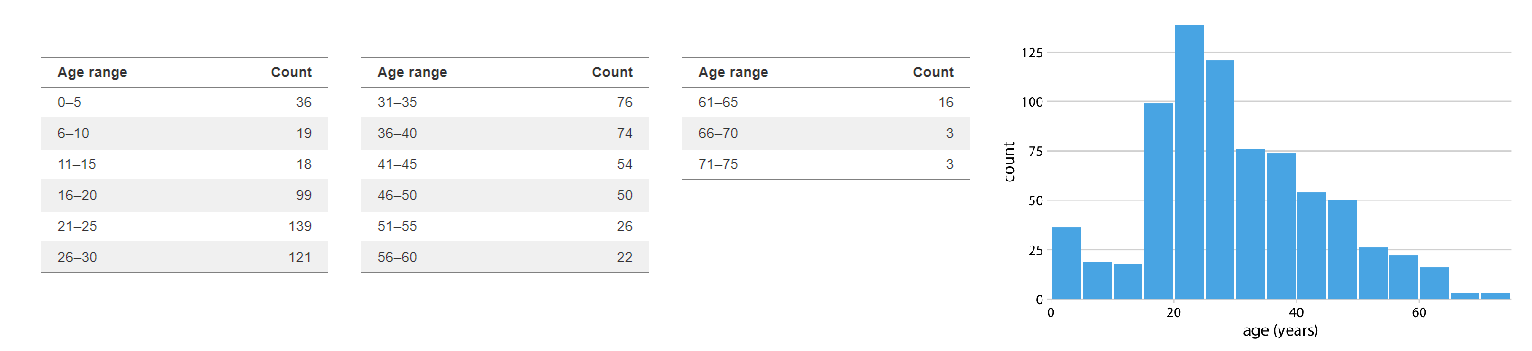


*   Density plot

More recently, histograms are increasingly replaced by density plots. In a density plot, we attempt to visualize the underlying probability distribution of the data by drawing an appropriate continuous curve.

This curve needs to be estimated from the data, and the most commonly used method for this estimation procedure is called **kernel density estimation**. In kernel density estimation, we draw a continuous curve (the kernel) with a small width (controlled by a parameter called **bandwidth**, which is also known as the smoothing parameter) at the location of each data point, and then we add up all these curves to obtain the final density estimate. 

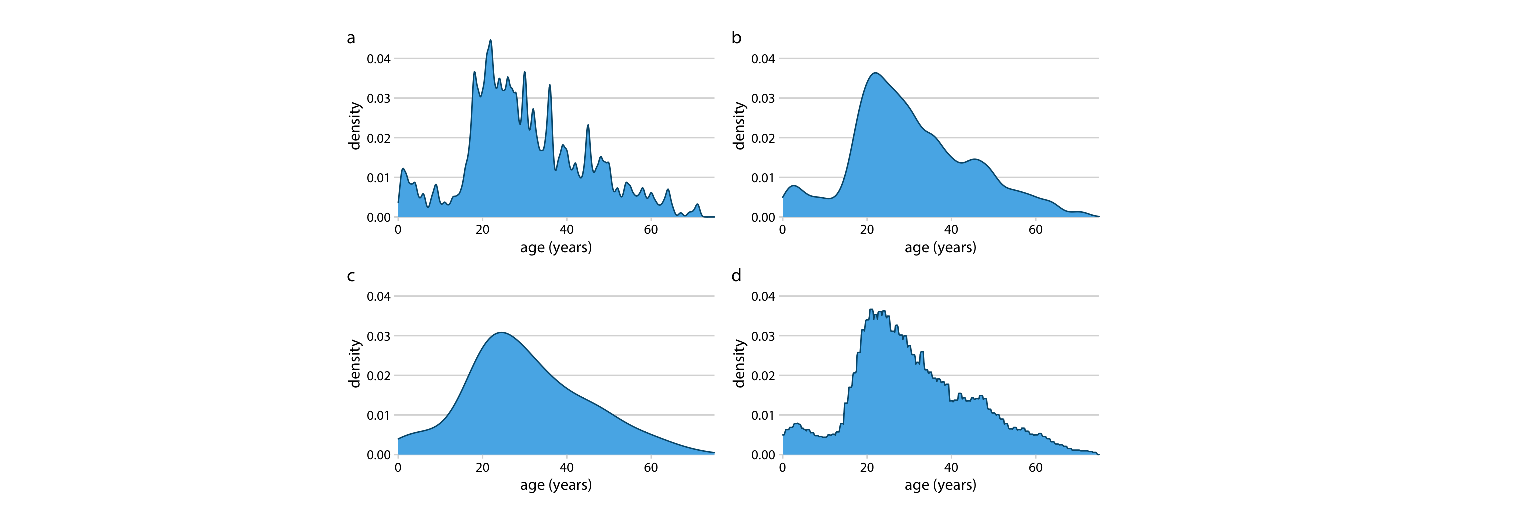


> Kernel density estimates depend on the chosen kernel and bandwidth. Here, the same age distribution of Titanic passengers is shown for four different combinations of these parameters: (a) Gaussian kernel, bandwidth = 0.5; (b) Gaussian kernel, bandwidth = 2; (c) Gaussian kernel, bandwidth = 5; (d) Rectangular kernel, bandwidth = 2.






*   Plotting a histogram and density plot



Let's go back to the diamonds dataset. How can we represent **the distribution of diamond along carat on the x-axis**?

In [28]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
#Plot a histogram using the diamonds dataset where x axis = carat
import plotly.express as px
fig = px.histogram(diamonds_df, x="carat")
fig.show()

In [30]:
#Change the bins parameter to 50
import plotly.express as px
fig = px.histogram(diamonds_df, x="carat", nbins=50)
fig.show()

If you want to visualize the kernel density function, you can use figure_factory library.

In [31]:
import plotly.figure_factory as ff
#distribution plot require group labels; we will define arbitrary group in here
group_labels = ['group A']

#In order to use figure_factory's kernel density plot, dataset need to be the list of series
carat=[diamonds_df.carat]

#We will use create_distplot function to make kernal density plot
fig = ff.create_distplot(carat, group_labels, bin_size=0.1)
fig.show()

## Mini-Exercise #2 
In the *diamonds dataset*, create a density plot of carets according to color (E, I, J). Three density plots should be on one plot.

*Hint: You need to extract three Series of carat value that colors are E, I, J respectively. Then, make the list of Series.

In [32]:
#Answers
#Define color group labels
group_labels = ['group E', 'group I', 'group J']

#Extract three Series of carat value that colors are E, I, J respectively
carat_E = diamonds_df[diamonds_df['color']=='E'].carat
carat_I = diamonds_df[diamonds_df['color']=='I'].carat
carat_J = diamonds_df[diamonds_df['color']=='J'].carat

#Make the list of three Series
carat = [carat_E, carat_I, carat_J]

#Make plot
fig = ff.create_distplot(carat, group_labels, bin_size=0.1)
fig.show()

Submission link: https://docs.google.com/document/d/1TBdBaKx1nRk3W2Phpz2PW9_SecfwxjbpoRIaeRvbXfA/edit?usp=sharing

#Visualizing Many Distributions at Once

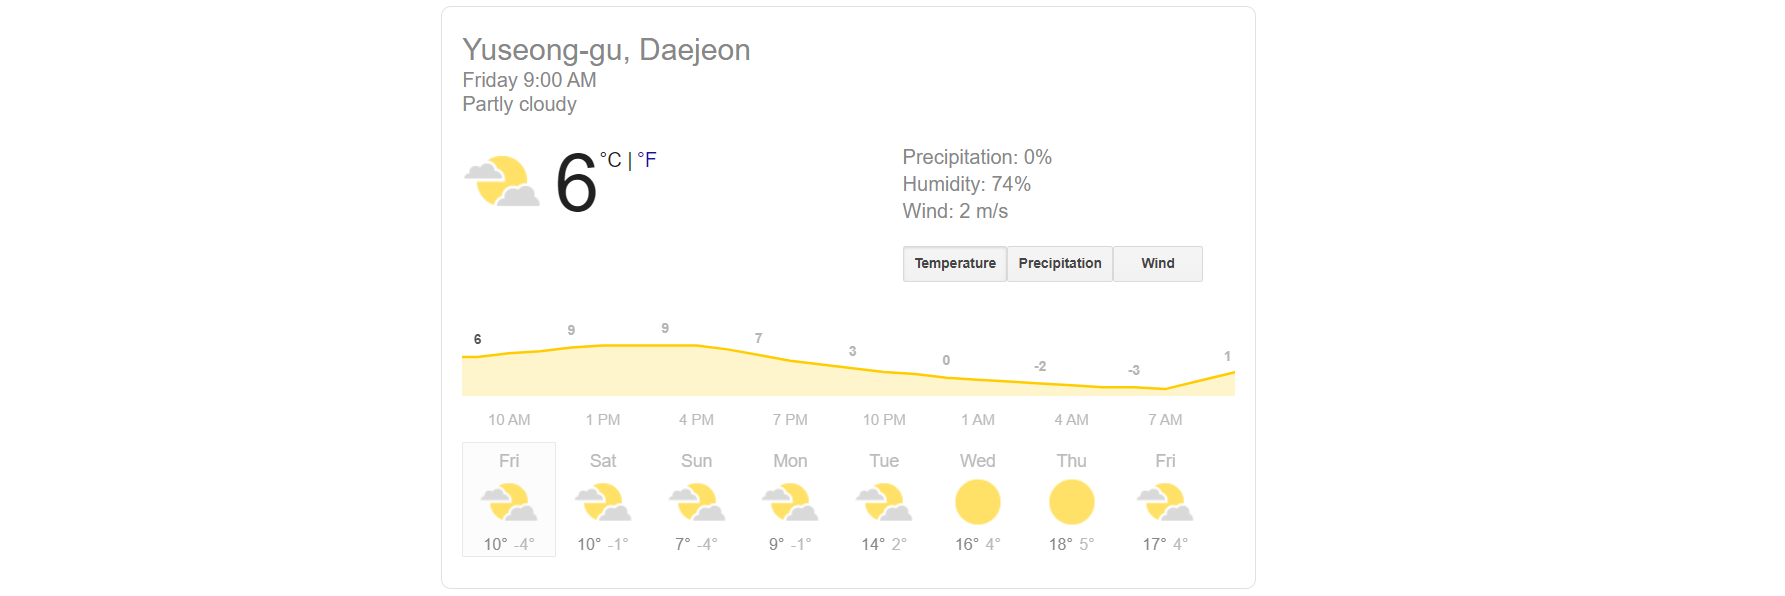

There are many scenarios in which we want to visualize multiple distributions at the same time. For example, consider weather data. We may want to visualize **how temperature varies across different months while also showing the distribution of observed temperatures within each month**. 

Whenever we are dealing with many distributions, it is helpful to think in terms of the **response variable** and one or more **grouping variables**. The response variable is the variable whose distributions we want to show. The grouping variables define subsets of the data with distinct distributions of the response variable. For temperature distributions across months, the response variable is the temperature and the grouping variable is the month. 

* Dataset: mpg (miles per gallon)

We will use mpg dataset for combined visualization of different distribution. This database has information such as mpg, weight, and accelation by vehicle.

![picture](https://drive.google.com/uc?export=view&id=1PrjxBpHmD62X7l7U276WFfYfxeASx_IO)

### **Box Plot**

Box plots are simple yet informative, and they work well when plotted next to each other to visualize many distributions at once. 


> The line in the middle of the boxplot represents the median, and the box encloses the middle 50% of the data. The distances of 1.5 times the height of the box in either direction are called the upper and the lower fences. Individual data points that fall beyond the fences are referred to as outliers and are usually showns as individual dots.



![picture](https://drive.google.com/uc?export=view&id=1H5SUhjDRY9k98sK0MKss6ZSycvkq4Vcu)


The box plot below shows multiple distributions between temperature(response variable) and month(grouping variable).

![picture](https://drive.google.com/uc?export=view&id=1mzOsNWzBFun_mdntkSYp9pyFEuUmMNOU)

* Creating a box plot

We will create a box plot to analyze the relationship between *model_ year* and *mileage* using the mpg dataset. We'll analyze manufacturing efficiency and the mileage of vehicles over a period of years. In this case, the grouping variable is *model_year* and the response variable is *mpg*.

In [33]:
#Load the dataset
import pandas as pd
mpg_df = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/auto-mpg.csv')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
import plotly.express as px
#Create multiple box plot using plotly.express.box()
fig = px.box(mpg_df, x='model year', y='mpg')
fig.show()

In [35]:
#Modify the mpg DataFrame by creating a new feature, model_decade.
import numpy as np
mpg_df['model_decade'] = np.floor(mpg_df['model year']/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,model_decade
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,80
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,80
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,80
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,80
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,80


In [36]:
#Now, let's redraw our box plot to look at mileage distribution for the two decades
fig = px.box(mpg_df, x='model_decade', y='mpg')
fig.update_layout(width=900, height=500)
fig.show()

In [37]:
#Use the color parameter to group by origin
fig = px.box(mpg_df, x='model_decade', y='mpg', color='origin')
fig.update_layout(width=900, height=500)
fig.show()

## Mini-Exercise #3
We learned how to make box plots. Let's learn how to add jitter plot next to the box plot! You can find how to make jitter plot in this link: https://plotly.com/python/box-plots/ 

In diamonds dataset, (1) extract data that the cut quality is 'Fair' and (2)  draw a box plot with jitter plot that can represent *price* according to *clarity*. (3) Report your insights that you can get from the visualization. What insights can you gain from the jitter plot? (rather than box plot)


In [38]:
fair_cut_df = diamonds_df[diamonds_df['cut']=='Fair']

fig = px.box(fair_cut_df, x='clarity', y='price')
fig.update_traces(boxpoints='all', jitter=0.3)
fig.show()

Submission link: https://docs.google.com/document/d/1YDcBfFEa0C73nCSZIcw63UyIOeC2EGAkviL28qG9-EY/edit?usp=sharing


## **Violin Plot**

Violin plot can be used whenever one would otherwise use a boxplot, and they provide a much more nuanced picture of the data. In particular, violin plots will accurately represent bimodal data whereas a boxplot will not.



> Only the y values of the points are visualized in the violin plot. The width of the violin at a given y value represents the point density at that y value. Violins begin and end at the minimum and maximum data values, respectively. The thickest part of the violin corresponds to the highest point density in the dataset.




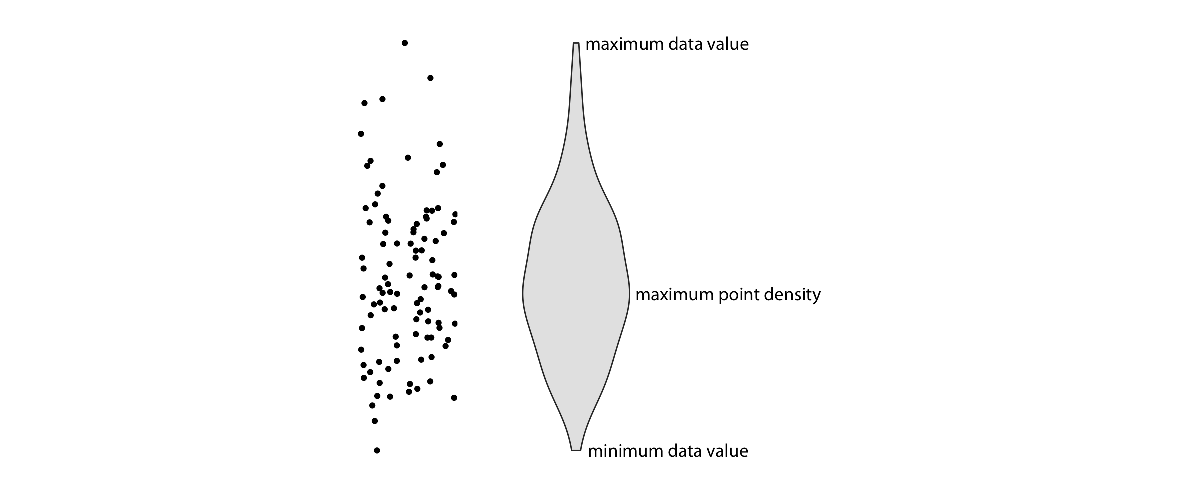

Before using violins to visualize distributions, verify that you have sufficiently many data points in each group to justify showing the point densities as smooth lines.

The violin plot below shows multiple distributions between temperature (response variable) and month (grouping variable).

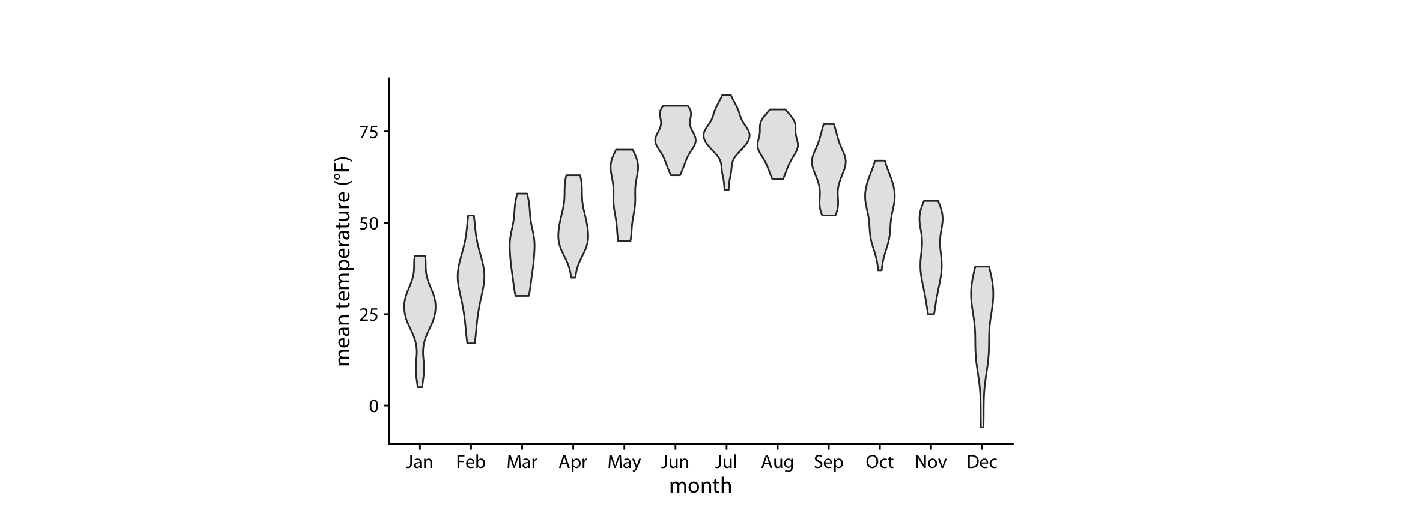

* Creating a Violin plot




We will use the mpg dataset and generate a violin plot depicting the detailed variation of mileage (mpg) based on model_decade and region of origin. Just like in the case of Boxplot, we will use plotly.

Generate the violin plot using the **violin** function in plotly.

In [39]:
#Generate the violin plot using the violinplot function in plotly
fig = px.violin(mpg_df, x='model_decade', y='mpg', color='origin')
fig.show()

## **Ridgeline Plot (Additional)**

In a histogram and density plot, distributions are visualized along the horizontal axis. We will expand on this idea by staggering the distribution plots in the **vertical direction**. The resulting visualization is called a ridgeline plot (or [joy plot](https://www.flerlagetwins.com/2018/05/joy-plot.html)), because these plots look like mountain ridgelines.
 

Ridgeline plots tend to work particularly well if want to show trends in distributions over time. The plot below shows temperatures in Lincoln, Nebraska in 2016. This plot was generated via ggplot in R. 

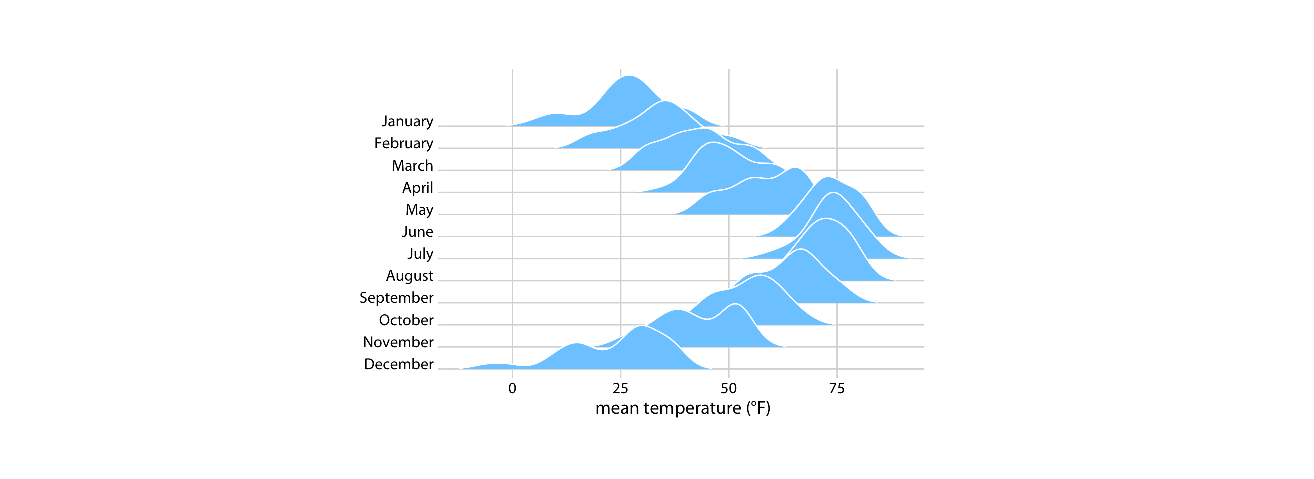

In [40]:
import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np

In [41]:
#We will split the color scale from low color to high color into predefined n_color
#plotly.colors.n_colors(lowcolor, highcolor, n_colors, colortype='tuple')
colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 12, colortype='rgb')

clarity=diamonds_df.clarity.unique()
d=[]
for c in clarity:
  price=diamonds_df.loc[diamonds_df.clarity==c].price
  array=price.to_numpy()
  d.append(array)
d=np.array(d, dtype="object")

In [42]:
#Visualize each ridgeline one by one 
#We will utilize violin plot in order to make ridgeline plot
fig = go.Figure()
for data_line, color, clarity in zip(d, colors, clarity):
    fig.add_trace(go.Violin(x=data_line, line_color=color, name=clarity))

#Update the orientation of the plot as horizontal and show only positive side plot
fig.update_traces(orientation='h', side='positive', width=3, points=False)

#Remove grid and zeroline of the plot
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.show()

# **Homework #4. 120 Years of Olympic History**

Due: April 4nd, 2023 23:59 PM

When you submit your Colab link, please be careful for the access permission (as 'anyone with the link' can edit or view the file so that TAs can grade your homework)

1. (30 points) We are going to use *120 years of Olympic History dataset acquired by Randi Griffin*. 

  * (1) What are the top five **countries** (column: 'Team' in our 
dataset) with the highest number of medals in the 2008 Olympics?

  * (2) What are the top five **sports** with the highest number of medals in the 2008 Olympics?

  * (Be careful!) In the given dataset, there are data on players who did not get any medals. Filter them out.

You can download the dataset here: https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/athlete_events.csv (Access this link and press ctrl+s button to save it as csv file.)





In [43]:
olympic_df = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/athlete_events.csv')

olympic_df = olympic_df.dropna(subset=['Medal']) # drop rows of which Medal is N/A
olympic_df = olympic_df[olympic_df['Year']==2008] # data only in 2008

In [44]:
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
159,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold


In [45]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 79 to 270986
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2048 non-null   int64  
 1   Name    2048 non-null   object 
 2   Sex     2048 non-null   object 
 3   Age     2048 non-null   float64
 4   Height  2043 non-null   float64
 5   Weight  2037 non-null   float64
 6   Team    2048 non-null   object 
 7   NOC     2048 non-null   object 
 8   Games   2048 non-null   object 
 9   Year    2048 non-null   int64  
 10  Season  2048 non-null   object 
 11  City    2048 non-null   object 
 12  Sport   2048 non-null   object 
 13  Event   2048 non-null   object 
 14  Medal   2048 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 256.0+ KB


In [46]:
# (1) What are the top five countries (column: 'Team' in our dataset) with the highest number of medals in the 2008 Olympics?

group_by_team = olympic_df.groupby(['Team']).count().reset_index()[['Team', 'ID']].sort_values('ID', ascending=False)
top_five_teams = group_by_team['Team'][:5]
top_five_teams # The answer

98    United States
18            China
4         Australia
74           Russia
39          Germany
Name: Team, dtype: object

In [47]:
# (2) What are the top five sports with the highest number of medals in the 2008 Olympics?

group_by_sport = olympic_df.groupby(['Sport']).count().reset_index()[['Sport', 'ID']].sort_values('ID', ascending=False)
top_five_sports = group_by_sport['Sport'][:5]
top_five_sports # The answer

23     Swimming
1     Athletics
19       Rowing
12     Football
15       Hockey
Name: Sport, dtype: object

  2. (50 points) Use the answer obtained in the previous problem. 
  
  Make a **grouped bar plot** that represents the number of medals according to medal type and sport type. Use the data only with top-five medal-awarded countries in 2008. 
  
  We are primarily interested in the differences in the number of medals **among medal type**, seperately for sports types. Therefore, you need to consider what feature will be in x-axis, y-axis, and legend. (For clarity, you don't need to including 'country' in x-axis, y-axis, and legend)

In [48]:
olympic_df = olympic_df[olympic_df['Team'].isin(top_five_teams)]
olympic_df = olympic_df.groupby(['Sport', 'Medal']).count().reset_index()[['Sport', 'Medal', 'ID']]
olympic_df = olympic_df.rename({'ID':'MedalCnt'}, axis='columns')
olympic_df

,Sport,Medal,MedalCnt
0,Archery,Bronze,4
1,Archery,Gold,1
2,Archery,Silver,3
3,Athletics,Bronze,16
4,Athletics,Gold,26
...,...,...,...
80,Weightlifting,Gold,9
81,Weightlifting,Silver,5
82,Wrestling,Bronze,4
83,Wrestling,Gold,8


In [49]:
fig = px.bar(olympic_df, x='Sport', y="MedalCnt", color="Medal", barmode="group", category_orders={'Medal': ["Bronze", "Silver", "Gold"]})
fig.show()

3. (20 points) Based on the result, improve your plot using design principles we learned **(at least two principles)**. Also, report your reason clearly why you improved your plot according to that princples

In [50]:
fig = px.bar(olympic_df, x='MedalCnt', y="Sport", color="Medal", barmode="group",
            category_orders={'Medal': ["Bronze", "Silver", "Gold"]},
            color_discrete_map={"Bronze":"#c95", "Silver": "silver", "Gold": "gold"},
            # template="simple_white",
            # template='plotly_dark',
            orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'},  plot_bgcolor='white', height=1000, width=700)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgb(203, 203, 227)', griddash='dot')
fig.show()

**Design Principles**
1. Avoiding chart junk
*   No background color
*   No border lines

2. Alignment
*   Descending order of number of medals from top to bottom
*   Decreased horizontal white space by modifying width
*   For readability of sport name, making chart horizontally. Sport names in original chart was wrote vertically.



## **Grading Criteria**


**Question 1**

(1) Filter out players who did not get medal (10pt)

(2) Report top 5 countries with the hightest number of medal in 2008 (10pt)

(3) Report top 5 sports with the highest number of medal in 2008 (10pt)

**Question 2**

(1) Make a grouped bar plot (20pt)

(2) Set the proper x-axis, y-axis, and legend according to the stated condition (30pt)
  * Condition: We are primarily interested in the differences in the number of medals among medal type, seperately for sports types. 

**Question 3**

(1) Improve original plot according to the principles (deal with two principles 10pt; one principle 5pt) 

(2) Report the reason why the plot was improved according to those principles (two principles 10pt; one principle 5pt) 


# **References**


*   Fundamentals of Data Visualization (A Primer on Making Informative and Compelling Figures) - Chapter 6, 7, and 9
*   Interactive Data Visualization - Chapter 1 and 2
* Plotly: https://plotly.com/python/getting-started/
* Plotly Graph_Objects: https://plotly.com/python/graph-objects/ 
* Plotly Express: https://plotly.com/python/plotly-express/ 




